# >>Disclaimer

'Target' class discribes different target distributions.

In [1]:
# <api>
import numpy as np
from scipy.stats import norm
from scipy.stats import multivariate_normal
from functools import partial
import time

from matplotlib import pyplot as plt
from bqplot import pyplot as bqplt
import bqplot
import ipywidgets
from ipywidgets import widgets, Layout
from IPython import display
#from ipywidgets import Layout
%matplotlib inline

# Load classes and functions from the previous parts
from jupyter_cms.loader import load_notebook
#smpl1 = load_notebook('./Sampling_part1.ipynb')
#smpl2 = load_notebook('./Sampling_part2.ipynb')
#smpl3 = load_notebook('./Sampling_part3.ipynb')
#smpl4 = load_notebook('./Sampling_part4.ipynb')
#smpl5 = load_notebook('./Sampling_part5.ipynb')
#smpl6 = load_notebook('./Sampling_part6.ipynb')

## Targed distributions

In [2]:
#<api>
class Target(object):
    '''A clas of different targets for animation.'''    
    def __init__(self):
        self.size = 3 # Size of the plot       
        X, Y = np.mgrid[-size:size:(1/200), -size:size:(1/200)]
        self.X = X
        self.Y = Y
        self.Z = X # doesn't have any sense, 
        
    def plot(self):
        plt.contourf(self.X, self.Y, self.Z)

## Multivariate normal

In [3]:
#<api>       
class MultNorm (Target):
    '''Multivariate normal target distribution'''
    def __init__(self, size=3, cov=[[1, 0.99],[0.99, 1]]):
        self.size = size
        self.start_point = [0, -2]
        self.distr = multivariate_normal(mean=[0,0], cov=cov)
        self.x = np.linspace(-size, size, 200)
        self.y = np.linspace(-size, size, 200)
        self.X, self.Y = np.meshgrid(self.x, self.y)     
        self.XY = np.empty(self.X.shape + (2,))
        self.XY[:,:,0] = self.X; self.XY[:,:,1] = self.Y        
        self.Z = self.distr.pdf(self.XY)
        
        
    def pdf(self, xy):
        return self.distr.pdf(xy)
    
    def logpdf(self, xy):
        return self.distr.logpdf(xy)       

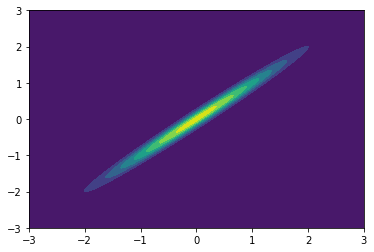

In [4]:
mn = MultNorm()
mn.plot()

## Bimodal multivariate normal

In [13]:
#<api>
class BimodMultNorm (Target):
    '''Bimodal multivariate normal target distribution. 
    Constants a1 and a2 are used to set the amplitude of the 1st and the 2nd distribution.'''
    
    def __init__(self, size=4, a1=1, mean1=[1,2], cov1=[[1, 0.1],[0.1, 1]], 
                 a2=1, mean2=[-1,-1], cov2=[[1, -0.1],[-0.1, 1]]):
        self.size = size
        self.start_point = [-2.5, -2.5]
        self.mod1 = multivariate_normal(mean=mean1, cov=cov1)
        self.mod2 = multivariate_normal(mean=mean2, cov=cov2)
        self.x = np.linspace(-size, size, 200)
        self.y = np.linspace(-size, size, 200)
        self.X, self.Y = np.meshgrid(self.x, self.y)     
        self.XY = np.empty(self.X.shape + (2,))
        self.XY[:,:,0] = self.X; self.XY[:,:,1] = self.Y
        self.a1=a1
        self.a2=a2
        self.Z = a1*self.mod1.pdf(self.XY) + a2*self.mod2.pdf(self.XY)        
        
    def pdf(self, xy):
        return self.a1*self.mod1.pdf(xy) + self.a2*self.mod2.pdf(xy)
    
    def logpdf(self, xy):
        return np.log(self.pdf(xy))

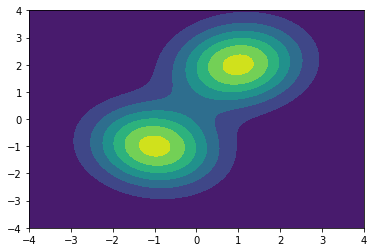

In [14]:
bm = BimodMultNorm()
bm.plot()

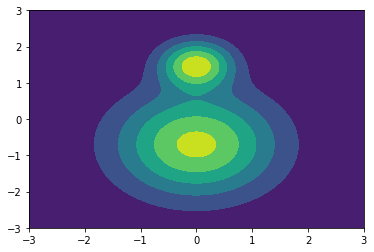

In [7]:
bb8 = BimodMultNorm(size=3, a1=1, mean1=[0,1.5], cov1=[[.2, 0],[0, .2]], 
                    a2=5, mean2=[0,-0.7], cov2=[[1, 0],[0, 1]])
bb8.plot()

## Rosenbrock (banana) function

In [18]:
#<api>
class Rosenbrock (Target):
    '''Rosenbrock function (banana function). NOT READY YET!'''
    def __init__(self, size=2, a=1, b=100):
        self.size = size
        self.start_point = [-1.5, -1.5]
        self.a = a
        self.b = b 
        self.distr = multivariate_normal(mean=[0,0], cov=[[2, 0],[0, 2]])
        self.x = np.linspace(-size, size, 200)
        self.y = np.linspace(-size, size, 200)
        self.X, self.Y = np.meshgrid(self.x, self.y)     
        self.XY = np.empty(self.X.shape + (2,))
        self.XY[:,:,0] = self.X; self.XY[:,:,1] = self.Y  
        self.Z = self.pdf(self.XY)
        
    
    def logpdf(self, xy):
        '''The function calculates -log(pdf) for one sample ([x,y]). Used only for sampling, not for plots.'''
        return -np.log((self.a-xy[0])**2 + self.b*(xy[1]-xy[0]*xy[0])**2)
    
    def pdf(self, xy):
        '''Probability density function of this distribution. Used to plot the heatmap.'''
        return (self.a-xy[:,:,0])**2 + self.b*(xy[:,:,1]-xy[:,:,0]*xy[:,:,0])**2
    
    def minlogpdf2plot(self, xy):
        '''The function calculates -log(pdf). Used just for plotting log-density; not for animation.'''
        return np.log(self.pdf(xy))
    
    def plot(self):
        plt.contourf(self.X, self.Y, self.Z)
        plt.colorbar()
        plt.show()

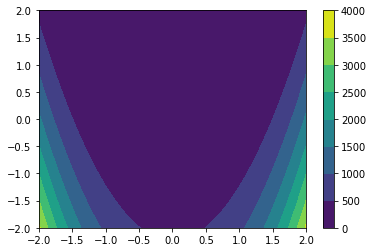

In [10]:
r = Rosenbrock(size=2, a=1, b=100)
r.plot()

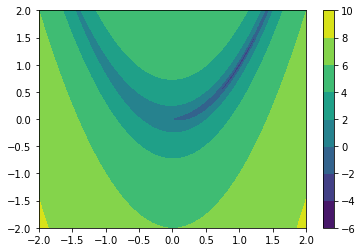

In [11]:
# Plot log-distribution
plt.contourf(r.X, r.Y, r.minlogpdf2plot(r.XY));
plt.colorbar()
plt.show()

## Donut

In [13]:
#<api>
class Donut (Target):
    '''Donut distribution using polar coorinates'''
    
    def __init__(self, size=4, mean=2, variance=0.2):
        self.size = size
        self.start_point = [-3.5, -3.5]
        self.rad_distr = norm(loc=mean, scale=variance)        
        self.x = np.linspace(-size, size, 200)
        self.y = np.linspace(-size, size, 200)
        self.X, self.Y = np.meshgrid(self.x, self.y)     
        self.XY = np.empty(self.X.shape + (2,))
        self.XY[:,:,0] = self.X 
        self.XY[:,:,1] = self.Y        
        self.Z = self.pdf(self.XY)
        
    def pdf(self, xy):               
        return self.rad_distr.pdf(np.sqrt(xy[:,:,0]**2 + xy[:,:,1]**2))
    
    def logpdf(self, xy):               
        return self.rad_distr.logpdf(np.sqrt(xy[0]**2 + xy[1]**2))
    
    def logpdf2plot(self, xy):               
        return self.rad_distr.logpdf(np.sqrt(xy[:,:,0]**2 + xy[:,:,1]**2))


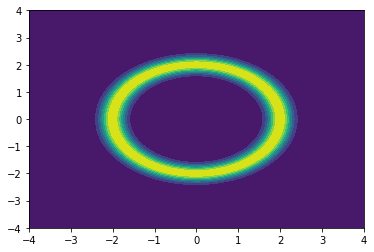

In [15]:
dr = Donut()
dr.plot()

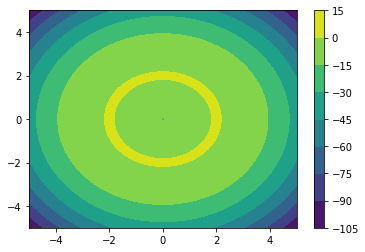

In [23]:
# Plot log-distribution
plt.contourf(dr.X, dr.Y, dr.logpdf2plot(dr.XY));
plt.colorbar()
plt.show()

## Bad versions of donut and banana

In [23]:
#<api>
class Donut_bad (Target):
    '''Donut distribution. Bad version.'''
    
    def __init__(self, size=4, a1=2, mean1=[0,0], cov1=[[1, 0],[0, 1]], 
                 a2=1, mean2=[0,0], cov2=[[0.25, 0],[0, 0.25]]):
        self.size = size
        self.start_point = [-3, -3]
        self.mod1 = multivariate_normal(mean=mean1, cov=cov1)
        self.mod2 = multivariate_normal(mean=mean2, cov=cov2)
        self.x = np.linspace(-size, size, 200)
        self.y = np.linspace(-size, size, 200)
        self.X, self.Y = np.meshgrid(self.x, self.y)     
        self.XY = np.empty(self.X.shape + (2,))
        self.XY[:,:,0] = self.X; self.XY[:,:,1] = self.Y
        self.a1=a1
        self.a2=a2
        self.Z = np.maximum(0.0000000001,(self.a1*self.mod1.pdf(self.XY) - self.a2*self.mod2.pdf(self.XY)))
        
        
    def pdf(self, xy):
        return np.maximum(0.00000000001,(self.a1*self.mod1.pdf(xy) - self.a2*self.mod2.pdf(xy)))
    
    def logpdf(self, xy):
        return np.log(np.maximum(0.000000000001,(self.a1*self.mod1.pdf(xy) - self.a2*self.mod2.pdf(xy))))

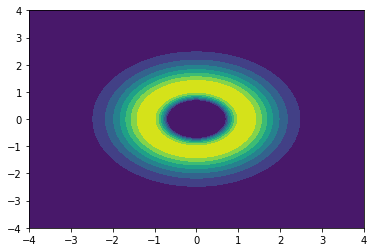

In [22]:
dnt = Donut_bad()
dnt.plot()

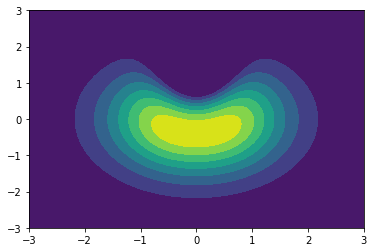

In [24]:
# Bad version of a banana distribution
banana = Donut_bad(size=3, a1=20, mean1=[0,0], cov1=[[1, 0],[0, 1]], a2=10, mean2=[0,1.5], cov2=[[.2, 0],[0, 1]])
banana.plot()